
## Hurricane Michael

Hurricane Michael made landfall along Florida’s northeastern Gulf Coast the afternoon of Wednesday, October 10th. This storm has been called the most powerful hurricane to hit the U.S. mainland in nearly 50 years.

we will Use the geopandas library, turn the latitude and longitude columns into a geographical Point data type then make a geodataframe. Plot the path of Hurricane Michael onto the US map.

In [5]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [7]:
#dataset of Hurricane Michael
location = "datasets/hurricaneMichael.csv"

#load data into dataframe
hurricaneM_df = pd.read_csv(location)
hurricaneM_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [8]:
hurricaneM_df.dtypes

AdvisoryNumber     object
Date               object
Lat               float64
Long              float64
Wind                int64
Pres                int64
Movement           object
Type               object
Name               object
Received           object
Forecaster         object
dtype: object

In [3]:
hurricaneM_df.shape

(45, 11)

In [9]:
hurricaneM_df.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

In [10]:
# turne the longitude column data into negative values(data source listed longitude direction instead of positive/negative)

hurricaneM_df['Long'] = 0 - hurricaneM_df['Long']

In [12]:
# make a new column to hold the longitude & latitude as a list
hurricaneM_df['coordinates'] = list(hurricaneM_df[['Long', 'Lat']].values)

In [13]:
#see new coordinates column
hurricaneM_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,"[-86.6, 18.0]"
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,"[-86.6, 18.3]"
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,"[-86.6, 18.8]"
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,"[-87.1, 18.4]"
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,"[-86.9, 18.6]"


In [14]:
#convert the coordinates to a geolocation type
hurricaneM_df['coordinates'] = hurricaneM_df['coordinates'].apply(Point)

In [15]:
#coordinates column now has POINT next to each coordinate pair value
hurricaneM_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (-87.09999999999999 18.4)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-86.90000000000001 18.6)


In [16]:
#coordinates column with geolocation data is just a regular pandas Series type
type(hurricaneM_df['coordinates'])

pandas.core.series.Series

In [17]:
#create a geolocation dataframe type using the coordinates column as the geolocation data
geo_hurr = gpd.GeoDataFrame(hurricaneM_df, geometry='coordinates')

In [18]:
#verify coordinates column is geolocation data type
type(geo_hurr['coordinates'])

geopandas.geoseries.GeoSeries

In [19]:
geo_hurr.dtypes

AdvisoryNumber      object
Date                object
Lat                float64
Long               float64
Wind                 int64
Pres                 int64
Movement            object
Type                object
Name                object
Received            object
Forecaster          object
coordinates       geometry
dtype: object

In [20]:
#import file that contains a US map shape polygons

filepath = "datasets/US_states(5m).json"

#data contains polygon shape coordinates for different map body types (state, etc.)
map_df = gpd.read_file(filepath)
map_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


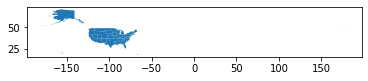

In [21]:
#map graph
map_df.plot()

In [22]:
# create a geodataframe that only contains the contiguous United States (48 states)

map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

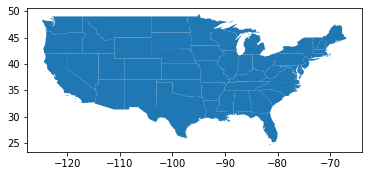

In [23]:
#map graph
map48.plot()

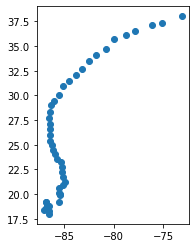

In [24]:
#plot the coordinates (no map)
geo_hurr.plot()

Text(0.5, 1, 'Hurricane Michael')

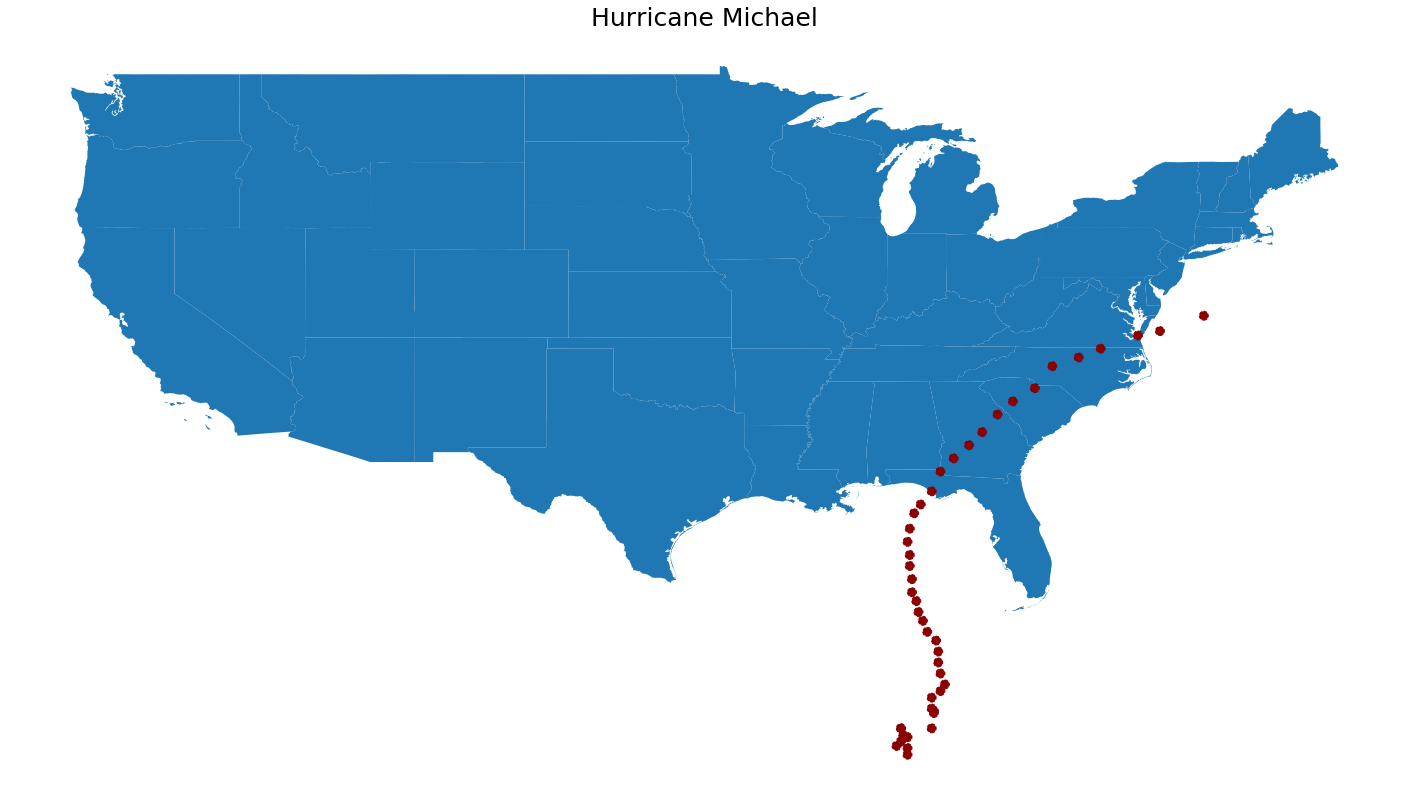

In [25]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(25,15))

#this is the map
basemap = map48.plot(ax=ax)

#plot coordinates on top of map graph
geo_hurr.plot(ax=basemap, color='darkred', marker="o", markersize=80, linestyle='dashed')

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Hurricane Michael", fontsize=25, fontweight=3)